In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./Bank Customer Churn.csv')
df.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2386,15637240,541,France,Male,46,4,124547.13,2,1,0,94499.06,0
8285,15572631,609,France,Male,25,10,0.00,1,0,1,109895.16,0
7744,15806822,739,France,Female,36,0,0.00,2,0,0,133465.57,0
5098,15730353,550,Germany,Male,29,9,145294.08,2,1,0,147484.13,0
9530,15584452,667,France,Male,41,6,0.00,2,0,0,167181.77,0


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns].corr()['products_number'].sort_values()

balance            -0.304180
churn              -0.047820
age                -0.030680
credit_card         0.003183
active_member       0.009612
credit_score        0.012238
tenure              0.013444
estimated_salary    0.014204
customer_id         0.016972
products_number     1.000000
Name: products_number, dtype: float64

<Axes: xlabel='balance', ylabel='credit_score'>

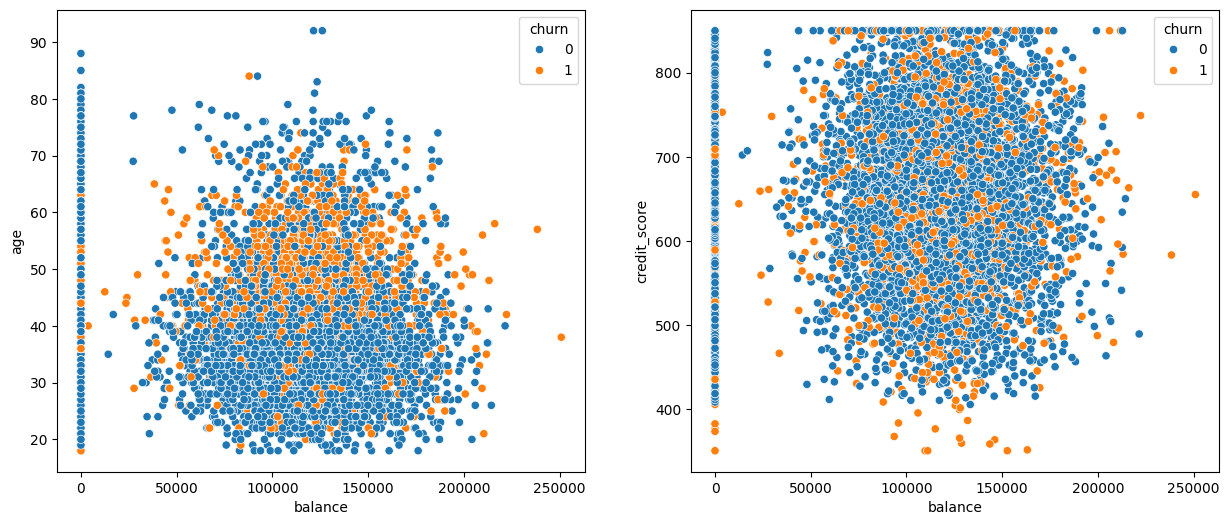

In [7]:

_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "balance", y = "age", data = df, hue="churn", ax = ax[0])
sns.scatterplot(x = "balance", y = "credit_score", data = df, hue="churn", ax = ax[1])


<Axes: xlabel='age', ylabel='churn'>

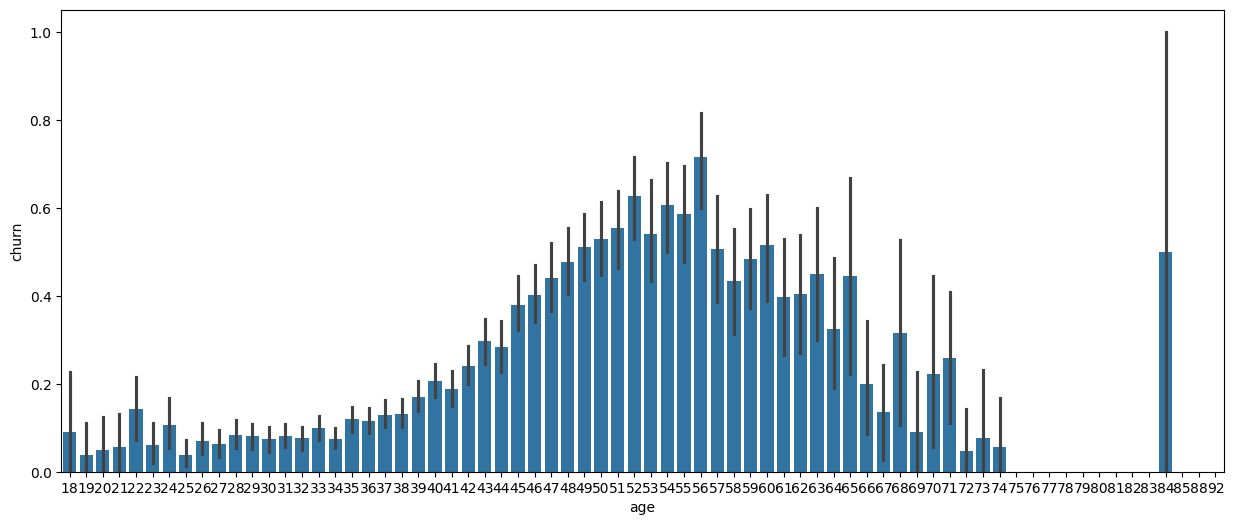

In [8]:
#selecting the features(age, products) and target(churn)
X = df[['age', 'products_number']]
y = df['churn']

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#bar plot of the age with churn
plt.figure(figsize=(15,6))
sns.barplot(x = "age", y = "churn", data = df ,)



<Axes: xlabel='products_number', ylabel='churn'>

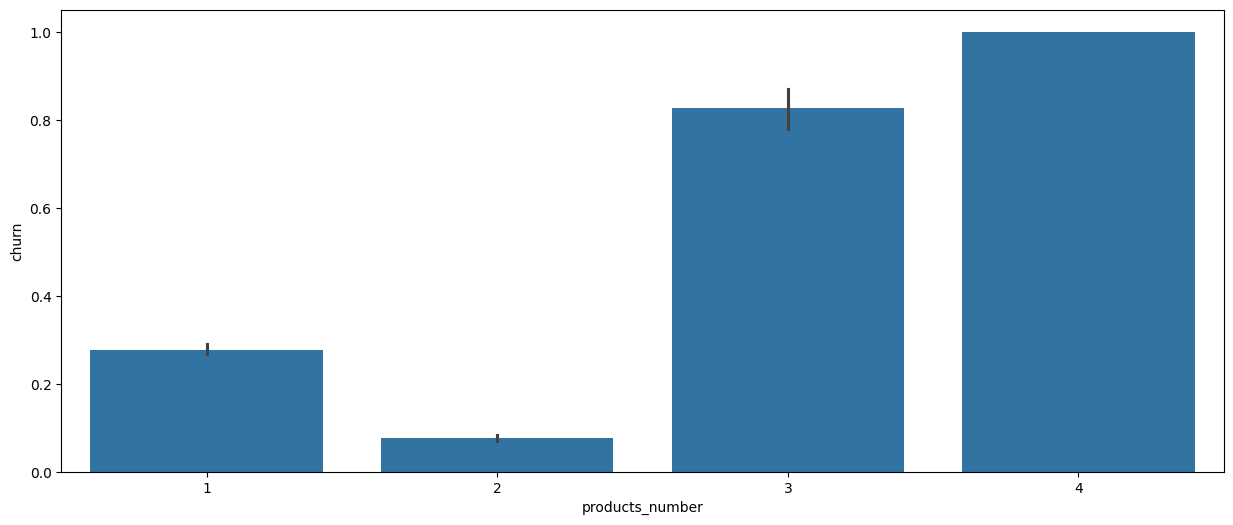

In [9]:
#bar plot of the products with churn
plt.figure(figsize=(15,6))
sns.barplot(x = "products_number", y = "churn", data = df ,)

<Axes: xlabel='churn', ylabel='count'>

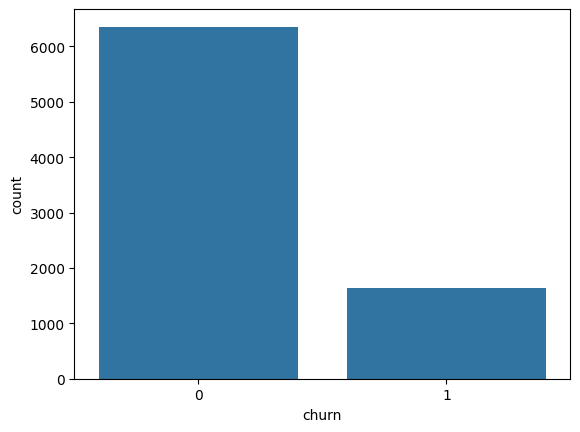

In [10]:
#bar plot of the target
sns.countplot(x = y_train)

In [11]:
#creating the model
model = LogisticRegression()

#training the model
model.fit(X_train, y_train)

#predicting the model
y_pred = model.predict(X_test)


#checking the accuracy
accuracy_score = accuracy_score(y_test, y_pred)
print("accuracy score is: ", accuracy_score)
print(classification_report(y_test, y_pred))

accuracy score is:  0.7865
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1607
           1       0.23      0.04      0.07       393

    accuracy                           0.79      2000
   macro avg       0.52      0.50      0.47      2000
weighted avg       0.69      0.79      0.72      2000



In our machine learning project focused on predicting customer churn, we worked with a dataset containing 1000 rows and 12 variables, all free of missing or duplicate values.

My findings revealed that customers using 3 or 4 bank products were more likely to churn. Furthermore, individuals aged between 40 and 65 had a higher  likeliness for discontinuing their relationship with the bank.

Upon applying the logistic regression model, we obtained an accuracy score of 79%. This suggests that our model effectively predicted customer churn based on the provided dataset.
